# Домашнее задание к лекции "Визуализация данных"

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [42]:
df = pd.read_csv('googleplaystore.csv')

In [43]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# обрабатывает столбец с ценой, сейчас там есть значки доллара и текстовые значения

In [44]:
df['Price'] = df['Price'].str.replace('$', '')

In [45]:
df.loc[df.Price.str.contains(r'\d+'), 'price'] = 1

In [50]:
df = df[df.price.notnull()]

In [51]:
df.Price = df.Price.apply(pd.to_numeric)

In [ ]:
# преобразовываем столбец просмотров в нужный формат

In [61]:
df.Reviews = df.Reviews.apply(pd.to_numeric)

4814617393

In [ ]:
# преобразовываем скачиваний просмотров в нужный формат

In [66]:
df['Installs'] = df['Installs'].str.replace('+', '').str.replace(',', '')

In [67]:
df.Installs = df.Installs.apply(pd.to_numeric)

#### Анализ значений оценок по категориям приложений

Text(0.5, 1.0, 'Boxplot ratings by top10 categories')

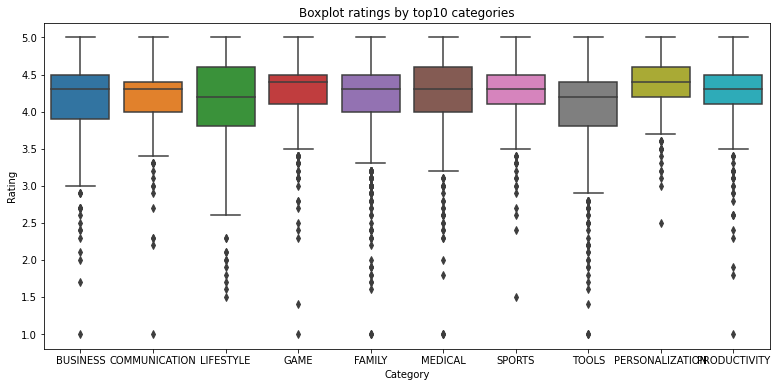

In [182]:
top_categories = df.Category.value_counts().sort_values(ascending = False).head(10).index.values
sns.boxplot(x="Category", y="Rating", 
            data=df[df.Category.isin(top_categories)]).set_title("Boxplot ratings by top10 categories")

Во всех категориях приложений есть приложения с наивысшей пользовательской оценкой. Приложения категории games имеют самые высокие средние оценки. Приложения категорий comminication, game, sports имеют применрно одинаковую длину усов и длину ящика.Наименьший разброс оценок у приложений категории personalization, минимальная оценка - выше 3.5. Самый высокий разброс оценок у приложений категории lifestyle. Также стоит отметить, что в приложениям категорий lifstyle, sports, personalization не встречается крайне низких оценок - 1. При этом в категории personalization самый низкий рейтинг имеет игра с оценкой 2.5.  Во всех категориях приложений нет верхних выбросов, но есть нижние. 

#### Анализ скачиваний по категории приложения и рейтингу контента

In [75]:
cantegory_contentrat_installs = df[df.Category.isin(top_categories)].pivot_table(
                        index='Category', 
                        columns='Content Rating', 
                        values='Installs', 
                        aggfunc=sum).fillna(0)

Text(0.5, 1.0, 'Heatmap installs by category and content rating')

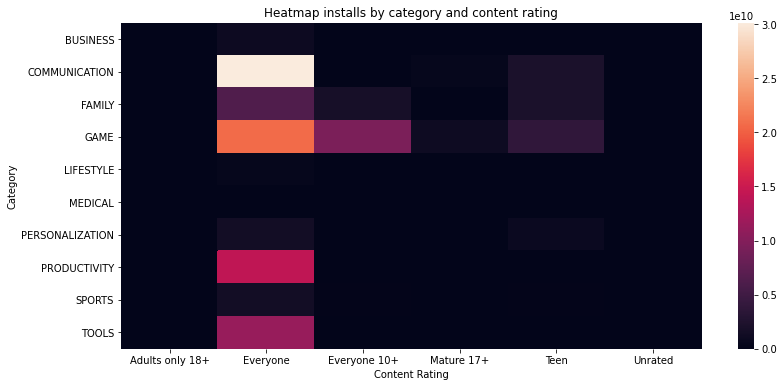

In [183]:
sns.heatmap(cantegory_contentrat_installs).set_title("Heatmap installs by category and content rating")

В целом, чаще всего скачиваются приложения без ограничения по возрасту. Самая популярная для скачивания категория - communication, на втором месте приложения категории game, затем productivity и tools => большинство пользователей пользуются мессенджерами, количество игроков мобильных приложений существенно меньше, однако этот сегмент популярен.  Приложения с высоким возрастным ограничением практически не скачиваются, это может быть связано с тем, что подобных приложений в принципе мало в google play. Игры с высоким возрастным ограничием менее часто скачиваются, чем игры без возрастного ограничения. Это, опять же, может быть связано игр с возрастным ограничием в google play. 
В сегменте возрастного ограничения 17+ немного популярнями являются игры, остальные категории приложений фактически не скачиваются; 

#### Зависимость просмотров и скачивания приложения

Text(0.5, 1.0, 'Correlation between Reviews and Installs')

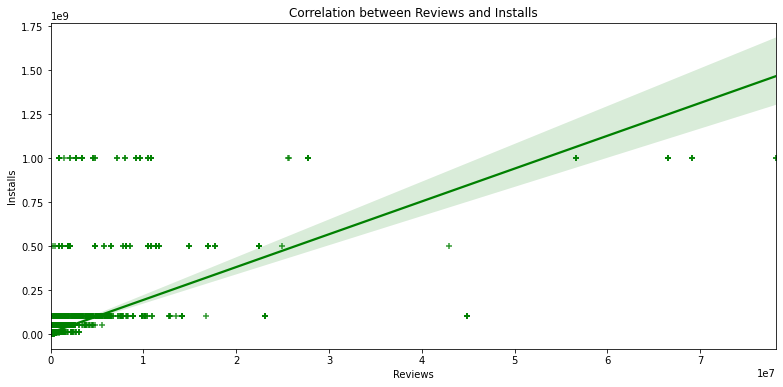

In [90]:
ax = sns.regplot(data=df, x='Reviews', y='Installs', color='green', marker='+')
ax.set_title('Correlation between Reviews and Installs')

Между просмотрами и скачиваниями существует сильная положительная взаимосвязь. На это может быть несколько причин:
1. Чем чаще игру рекламируют, тем чаще игру просматривуют и тем больше скачивают
2. Чем чаще игру скачивают, тем чаще игра отображается в качестве рекоммендации пользователям (в результате алгоритмов google play)

Однако, на графике видно, что на положительный наклон линии регрессии сильное влияение оказывают точки, которые являются выбросами. Поэтому вывод преждевременный

#### Рейтинг по категориям в разрезе типа игры (платная/бесплатная)

In [152]:
score_category = df[df.Category.isin(top_categories)].pivot_table(
                        index='Category', 
                        columns='Type', 
                        values='Rating', 
                        aggfunc=np.mean)
score_category

Type,Free,Paid
Category,,
BUSINESS,4.118493,4.200000
COMMUNICATION,4.165359,4.063636
FAMILY,4.181767,4.295062
GAME,4.279804,4.372727
LIFESTYLE,4.085473,4.250000
MEDICAL,4.165649,4.259091
PERSONALIZATION,4.307287,4.441791
PRODUCTIVITY,4.211712,4.205556
SPORTS,4.221212,4.254545


Text(0.5, 1.0, 'Average rating by category and app type')

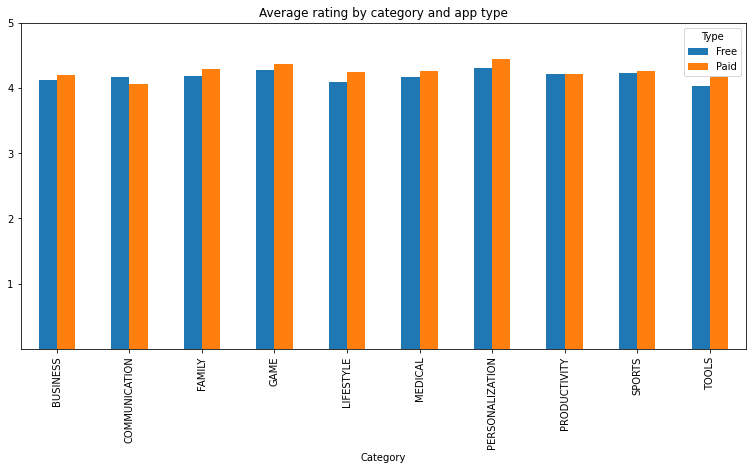

In [184]:
score_category.plot(kind='bar',  yticks=range(1, 6)).set_title("Average rating by category and app type")

Среднее значение значение по разным категориям приблизительно одинаковое, при этом можно заметить, что среднее значение по беспланым и платным играм внутри одной  категории отличается. 

In [153]:
difference = score_category['Paid'] - score_category['Free']

Text(0.5, 1.0, 'Difference in average rating between paid and free apps by category')

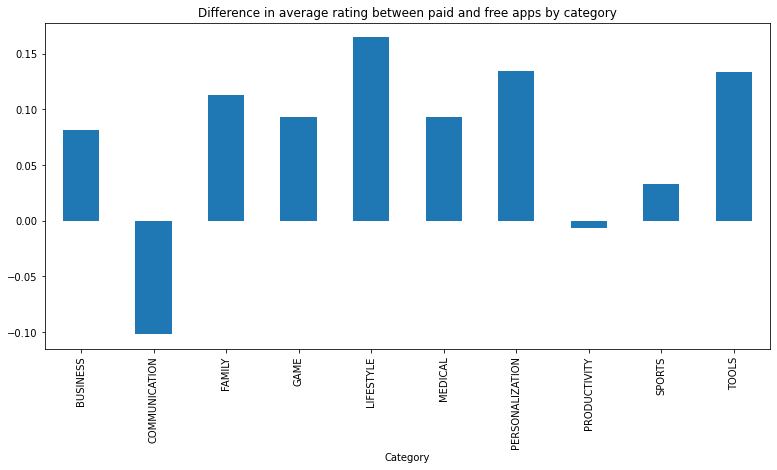

In [186]:
difference.plot(kind='bar').set_title("Difference in average rating between paid and free apps by category")

В большинстве категорий приложений средний рейтинг платных приложений выше, чем средний рейтинг бесплатных приложений. При этом наибольший разрва сохраняется в категориях lifestyle, tools и personalization. Можно выдвинуть гипотезу о том, что пользователи готовы доплачивать за качествественные приложения в данных категориях. 
В категориях communication и productivity рейтинг бесплатных приложений в среднем выше, чем платных. Наибольший разрыв в категории communication - 0.10 пунктов. В целом, пользователи действительно привыкли пользоваться мессенжерами/соц сетями бесплатно. Однако разрыв в  средних оценках все еще достаточно маленький для всех категорий.

#### Распределение оценок приложений

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Rating distribution')

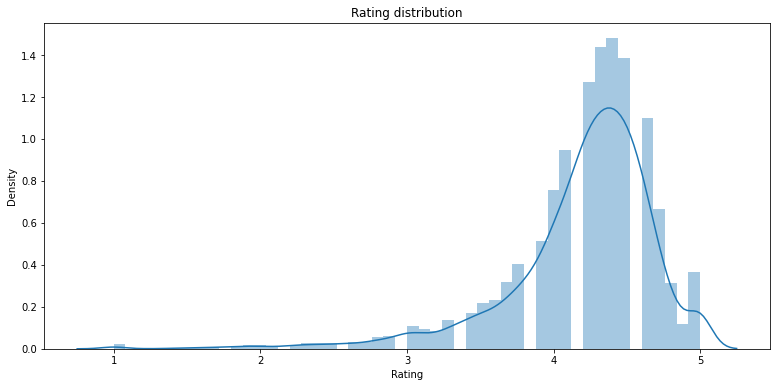

In [181]:
ax = sns.distplot(df.Rating)
ax.set_title('Rating distribution')

Распределение оценок приложений смешено в правую сторону, то есть приложения чаще имеют высокий рейтинг, чем низкий. Наиболее популярной оценкой является оценка 4.3, 5 ставят чаще, чем 3. Распределение в принципе напоминает нормалаьное 